In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('Data/combined.csv')

In [3]:
df = df.dropna()

In [4]:
df

,text,sentiment,id
0,@USER.wood17 knp lo gak berani bersumpah dan b...,1,401
1,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,1,1
2,Geblek lo tata...cowo bgt dibela2in balikan......,1,2
3,"haha, somad somad. Muka dekil otak 0% , kok ya...",1,402
4,"hahaha, kaum sableng 212 kl berita begini mrk ...",1,403
...,...,...,...
14701,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,1,14702
14702,"Betul bang hancurkan merka bang, musnahkan chi...",1,14703
14703,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...",1,14704
14704,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar...",1,14705


In [5]:
# load all the rows of text into a list sentences[]
sentences = df['text'].tolist()
sentences

['@USER.wood17 knp lo gak berani bersumpah dan bertaruh? Krnlo pecundang. Lo mau lempar batu sembunyi tangan. Akun lo aja bodong. Lo ngaca. Nggak punya kaca? Biar lo lihat seberapa pengecutnya lo',
 " <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!",
 'Geblek lo tata...cowo bgt dibela2in balikan...hadeww...ntar ditinggal lg nyalahin tuh cowo...padahal kitenya yg oon.',
 'haha, somad somad. Muka dekil otak 0% , kok ya g malu ngaku ustad....',
 'hahaha, kaum sableng 212 kl berita begini mrk buta tuli...',
 'Kmrn termewek2 skr lengket lg duhhh kok labil bgt sih mbak kya abege ajah ato yg kmrn cari sensasi biar top markotoppp ertong gk berkualitas',
 'hahaha, makin stress aja  ni umat sableng, dlu raja salma jg d catut  dlm mslh rijik, eh skrg tmbh parah nyatut kepala negara tetangga, segitu parahnya pengikut lu mad...',
 'Intiny

Average length of sentences: 17.20359037127703
Maximum length of sentences: 152
Minimum length of sentences: 1


(array([7.880e+02, 1.764e+03, 2.003e+03, 1.898e+03, 1.721e+03, 1.618e+03,
        1.178e+03, 8.250e+02, 5.910e+02, 4.980e+02, 5.180e+02, 4.860e+02,
        4.160e+02, 2.270e+02, 1.000e+02, 3.800e+01, 1.000e+01, 7.000e+00,
        3.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   4.02,   7.04,  10.06,  13.08,  16.1 ,  19.12,  22.14,
         25.16,  28.18,  31.2 ,  34.22,  37.24,  40.26,  43.28,  46.3 ,
         49.32,  52.34,  55.36,  58.38,  61.4 ,  64.42,  67.44,  70.46,
         73.48,  76.5 ,  79.52,  82.54,  85.56,  88.58,  91.6 ,  94.62,
         97.64, 100.66, 103.68, 106.7 , 109.72, 112.74, 115.76, 118.78,
        121.8 , 

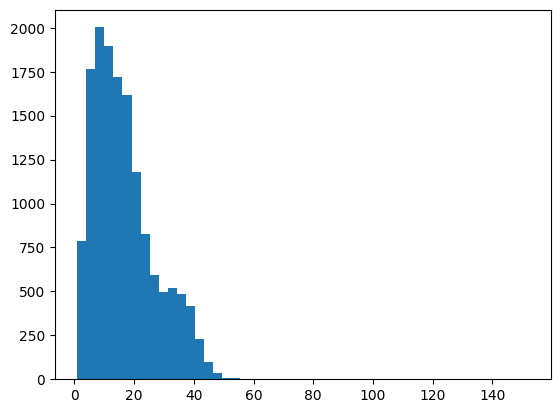

In [6]:
# finding the average length of the sentences
avg_len = sum([len(sentence.split()) for sentence in sentences]) / len(sentences)
max_len = max([len(sentence.split()) for sentence in sentences])
min_len = min([len(sentence.split()) for sentence in sentences])

print(f'Average length of sentences: {avg_len}')
print(f'Maximum length of sentences: {max_len}')
print(f'Minimum length of sentences: {min_len}')

# finding the distribution of the length of the sentences
plt.hist([len(sentence.split()) for sentence in sentences], bins=50)

In [6]:
stopwords = ['<USERNAME>', 'USER']
punctuation = ['.', ',', '!', '?', ';', ':', '-', '(', ')', '[', ']', '{', '}', '"', "'"]
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [26]:
# remove stopwords, punctuation and numbers from the sentences
df_updated = df.copy()

In [27]:
# replace stopwords with <OOV>
for stopword in stopwords:
    df_updated['text'] = df_updated['text'].apply(lambda x: x.replace(stopword, '<OOV>'))

In [28]:
# replace punctuation with ''
for punc in punctuation:
    df_updated['text'] = df_updated['text'].apply(lambda x: x.replace(punc, ' '))

In [30]:
# replace numbers with ' '
for num in numbers:
    df_updated['text'] = df_updated['text'].apply(lambda x: x.replace(num, ' '))

In [33]:
# using lower case for all the words
df_updated['text'] = df_updated['text'].apply(lambda x: x.lower())

In [34]:
# convert to csv df_updated
df_updated 

,text,sentiment,id
0,@<oov> wood knp lo gak berani bersumpah dan ...,1,401
1,<oov> tolol gak ada hubungan nya keguguran ...,1,1
2,geblek lo tata cowo bgt dibela in balikan ...,1,2
3,haha somad somad muka dekil otak % kok ya...,1,402
4,hahaha kaum sableng kl berita begini mrk ...,1,403
...,...,...,...
14701,muka si babi ahok tuh yg mirip serbet lantai ...,1,14702
14702,betul bang hancurkan merka bang musnahkan chi...,1,14703
14703,sapa yg bilang ahok anti korupsi klo grombo...,1,14704
14704,gw juga ngimpi sentilin biji babi ahok pcetar...,1,14705


In [35]:
df_updated.to_csv('Data/updated_combined.csv', index=False)